<a href="https://colab.research.google.com/github/sunitatripathi/hello-world/blob/master/Louv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import networkx as nx
import numpy as np
from community import community_louvain
import matplotlib.pyplot as plt

In [2]:
def generate_network(n):
    '''
    This function will generate a random weighted network associated to the user specifed
    number of nodes. 
    
    params:
        n (Integer) : The number of nodes you want in your network
    
    returns:
        A networkX multi-graph
        
    example:
        G = generate_network(n)
    '''
    # initialize dictionary with nodes
    graph_dct = {node:[] for node in range(n)}
    nodes = list(range(n))
    
    # generate edges
    for n,edge_list in graph_dct.items():
        edge_c = random.randint(min(nodes), int(max(nodes) / 2))
        el = random.sample(nodes, edge_c)
        graph_dct[n] = el
    
    # create networkx multi-edge graph
    G = nx.MultiGraph(graph_dct)
    return G

In [59]:
%%time
n = 50
G = generate_network(n)

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 3.03 ms


In [60]:
print(nx.info(G))

MultiGraph with 50 nodes and 276 edges


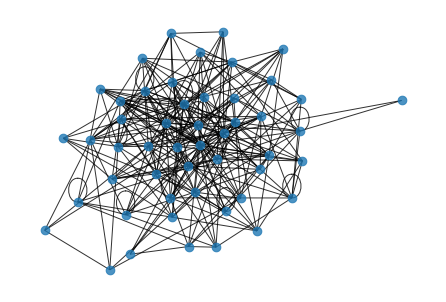

In [61]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8)
plt.show()

In [64]:
comms = community_louvain.best_partition(G)

In [63]:
comms

{0: 0,
 1: 4,
 2: 2,
 3: 4,
 4: 5,
 5: 4,
 6: 4,
 7: 5,
 8: 0,
 9: 5,
 10: 2,
 11: 3,
 12: 2,
 13: 5,
 14: 4,
 15: 3,
 16: 1,
 17: 2,
 18: 4,
 19: 2,
 20: 3,
 21: 5,
 22: 1,
 23: 3,
 24: 2,
 25: 3,
 26: 5,
 27: 4,
 28: 0,
 29: 1,
 30: 0,
 31: 4,
 32: 3,
 33: 0,
 34: 1,
 35: 4,
 36: 1,
 37: 3,
 38: 2,
 39: 0,
 40: 1,
 41: 0,
 42: 5,
 43: 1,
 44: 2,
 45: 5,
 46: 5,
 47: 4,
 48: 1,
 49: 1}

Visualize Communities

In [66]:
unique_coms = np.unique(list(comms.values()))
cmap = {
    0 : 'maroon',
    1 : 'teal',
    2 : 'black', 
    3 : 'orange',
    4 : 'green',
    5 : 'blue'
}

In [67]:
node_cmap = [cmap[v] for _,v in comms.items()]

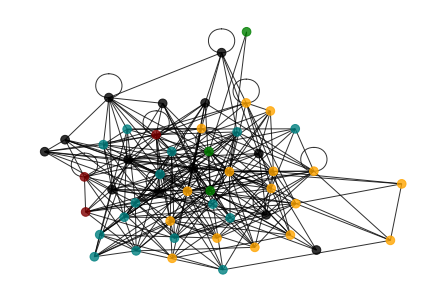

In [68]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 75, alpha = 0.8, node_color=node_cmap)
plt.show()